## Image processing for CT scans

### example by Xiao Luo, luoxiao@utexas.edu, https://github.com/playbar12641/

If you do not have the masking files for your scans, run this first.

By default:
```python
i_have_mask = False # means I do not have masking files
r=79 # pixel radius is specified upfront
```

In [9]:
# python libraries
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# my library
from CTprocessinglib import read_pile  # read pile file and has option of filter data
from CTprocessinglib import pick_circle # get circle centers for scans
from CTprocessinglib import create_circular_mask # a disc-shape mask
from CTprocessinglib import create_square_mask # a square-shape mask 
from CTprocessinglib import create_mask_matrix # a matrix contains all crossectional mask, circle or square
from CTprocessinglib import crop_scan # crop out the scan based on the circular and square mask

# if you have the circle center but you want to test put True, 
# if no, put False 
i_have_mask = False #default is False
r=79 # pixel radius is specified upfront

#### Step 1, specify directory and load baseline scans

First, change the directory here. Then, load the base line scans, in this example, one scan is the air baseline, the other is the oil baseline scan.

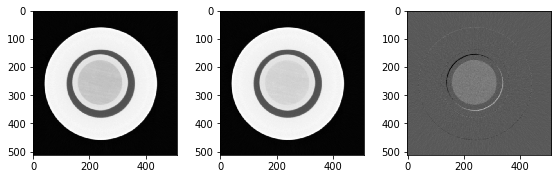

In [10]:
# specify working directory
# this function get the absolute path from the relative path (from the user directory)
path=os.path.expanduser('~\\Box Sync\\CT result\\CT_workflow')  
os.chdir(path) # set the working directory

# load the baseline data apply a median filter of size k
k = 4
# inputs: path, filename, and filter size
airBL = read_pile(path,'pile_LX_airBL_072019_01',4)
oilBL = read_pile(path,'pile_LX_oilBL_072019_01',4)

# check by plot out the image
n=0
plt.subplot(131)
imgplot = plt.imshow(airBL[:,:,n],cmap='gray')
plt.subplot(132)

imgplot = plt.imshow(oilBL[:,:,n],cmap='gray')
plt.subplot(133)

imgplot = plt.imshow(oilBL[:,:,n]-airBL[:,:,n],cmap='gray')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=1.0, wspace=0.3, hspace=0.2)
plt.draw()

#### Step 2,  calculate masking matrix

Ultimately, I just need the circular and square mask. 
If I do not have the mask matrices, I will compute it. 
If I have, it will be loaded. 

In [11]:
nr, nc, nz = airBL.shape # get number of row, col, and slices

if i_have_circen==False:

    nr, nc, nz = airBL.shape # get number of row, col, and slices
    xi=243;yi=245  # initial guess of the circle center
    dx=1; dy=1 # increments in x, y coordinations on circle center
    nx=9; ny=9 # number of increments in x ,and y    
    n=0 # first slice
    dif = oilBL-airBL # inputing the difference between air and oil baseline
    x_guess, y_guess = pick_circle(xi,yi,dx,dy,nx,ny,r,dif[:,:,n])

    circle_centers = np.zeros((nz,2))
    dx=1;nx=5   # decrease the range of interested because the good initial guess is obtained
    dy=1;ny=5

# loop to find the circle center for all slices
    for i in range(nz):
        x_guess, y_guess = pick_circle(x_guess,y_guess,dx,dy,nx,ny,r,dif[:,:,i])
        circle_centers[i,:] = [x_guess,y_guess]
    circle_centers = circle_centers.astype(int)  # need to save as int
    
    # calculate mask matrices
    square_mask = create_mask_matrix(nr, nc, nz, circle_centers, r, 'square')
    circular_mask = create_mask_matrix(nr, nc, nz, circle_centers, r, 'circle')
    
    # save the masking matrix and circle centers
    np.save('square_mask',square_mask)
    np.save('circular_mask',circle_mask)
    #np.save('circle_centers',circle_centers)
    
elif i_have_mask==True:
    #circle_centers=np.load('circle_centers.npy').astype(int)
    square_mask = np.load('square_mask.npy').astype(bool)
    circle_mask = np.load('circular_mask.npy').astype(bool)
    
else:
    print('i_have_circen can only be True or False')

print(circle_centers)